In [1]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [4]:
Data = pd.read_csv('Fraud_check.csv')
Data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
Data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in Data.select_dtypes(include='object'):
    Data[column] = le.fit_transform(Data[column])

Data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


<ipython-input-10-04fd13a0fc99>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data["City.Population"], kde=False, bins=10)


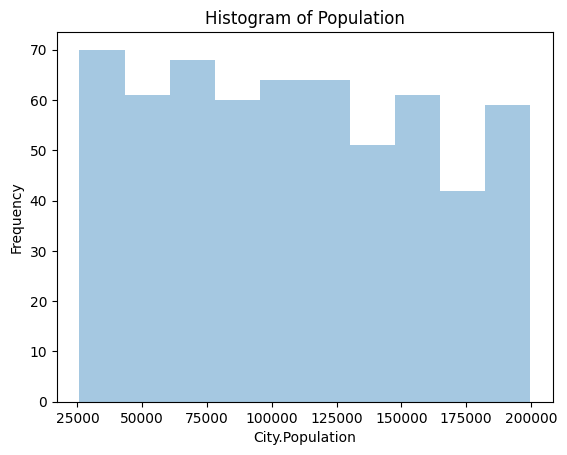

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram for the "Sales" column
sns.distplot(Data["City.Population"], kde=False, bins=10)

# Add labels and title
plt.xlabel("City.Population")
plt.ylabel("Frequency")
plt.title("Histogram of Population")

# Show the plot
plt.show()

In [39]:
Data.head(1)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1


<ipython-input-40-7f6fdbfc492a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data["Work.Experience"], kde=False, bins=10)


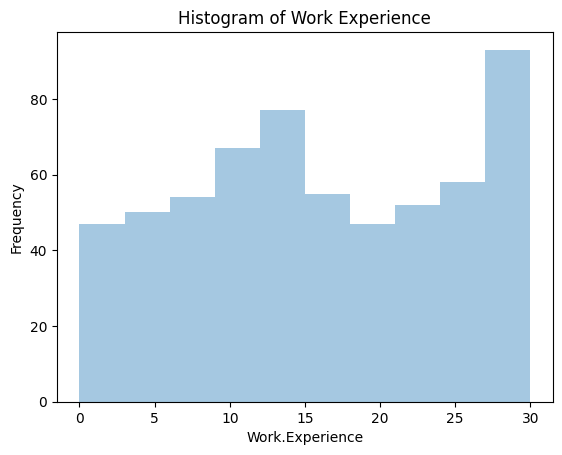

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram for the "Sales" column
sns.distplot(Data["Work.Experience"], kde=False, bins=10)

# Add labels and title
plt.xlabel("Work.Experience")
plt.ylabel("Frequency")
plt.title("Histogram of Work Experience")

# Show the plot
plt.show()

<ipython-input-42-dba92c0747e6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data["Urban"], kde=False, bins=10)


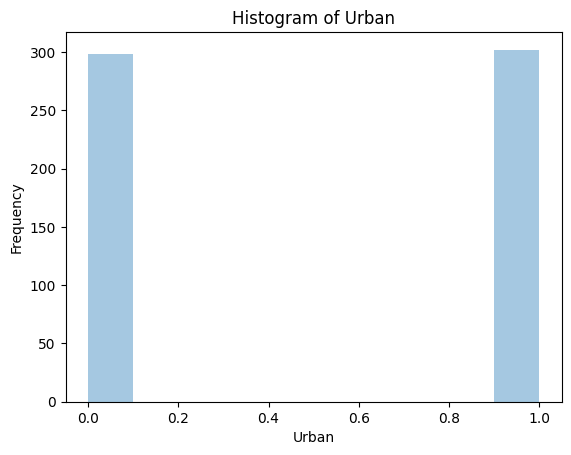

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram for the "Sales" column
sns.distplot(Data["Urban"], kde=False, bins=10)

# Add labels and title
plt.xlabel("Urban")
plt.ylabel("Frequency")
plt.title("Histogram of Urban")

# Show the plot
plt.show()

In [11]:
x =Data.iloc[:, 1:]
x

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,2,68833,50047,10,1
1,0,33700,134075,18,1
2,1,36925,160205,30,1
3,2,50190,193264,15,1
4,1,81002,27533,28,0
...,...,...,...,...,...
595,0,76340,39492,7,1
596,0,69967,55369,2,1
597,0,47334,154058,0,1
598,1,98592,180083,17,0


In [12]:
y = Data.iloc[:,0]
y

0      0
1      1
2      0
3      1
4      0
      ..
595    1
596    1
597    0
598    1
599    0
Name: Undergrad, Length: 600, dtype: int64

In [ ]:
print(x.head())
print(y.head())

In [13]:
seed = 5
kfold = KFold(n_splits=5,random_state=seed,shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 50

In [14]:
model = BaggingClassifier(estimator=cart, n_estimators=num_trees, random_state=seed)
model

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=5)

In [15]:
results = cross_val_score(model, x,y, cv=kfold)
results

array([0.48333333, 0.53333333, 0.44166667, 0.54166667, 0.475     ])

In [16]:
print(results.mean())

0.495


In [17]:
## bagging / random forest
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [18]:
x

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,2,68833,50047,10,1
1,0,33700,134075,18,1
2,1,36925,160205,30,1
3,2,50190,193264,15,1
4,1,81002,27533,28,0
...,...,...,...,...,...
595,0,76340,39492,7,1
596,0,69967,55369,2,1
597,0,47334,154058,0,1
598,1,98592,180083,17,0


In [19]:
y

0      0
1      1
2      0
3      1
4      0
      ..
595    1
596    1
597    0
598    1
599    0
Name: Undergrad, Length: 600, dtype: int64

In [20]:
num_tress = 100
max_features = 3
kfold = KFold(n_splits=10)

In [21]:
model = RandomForestClassifier(n_estimators=num_tress, max_features=max_features)

In [22]:
results = cross_val_score(model, x,y, cv=kfold)
results

array([0.48333333, 0.43333333, 0.5       , 0.51666667, 0.51666667,
       0.61666667, 0.5       , 0.53333333, 0.43333333, 0.53333333])

In [23]:
print(results.mean())

0.5066666666666666


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (420, 5)
X_test shape: (180, 5)
y_train shape: (420,)
y_test shape: (180,)


In [25]:
from sklearn.metrics import accuracy_score

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100,max_depth=5)

# fit the model with the training data
model.fit(X_train,y_train)

predict_train = model.predict(X_train)
print('\nTarget on train data',predict_train)

accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)


Target on train data [1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0
 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1
 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1
 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1
 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0
 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0
 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1
 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1
 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1
 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0
 1 1 0 1 1 0 1 0 0 1 1 0 1]

accuracy_score on train dataset :  1.0


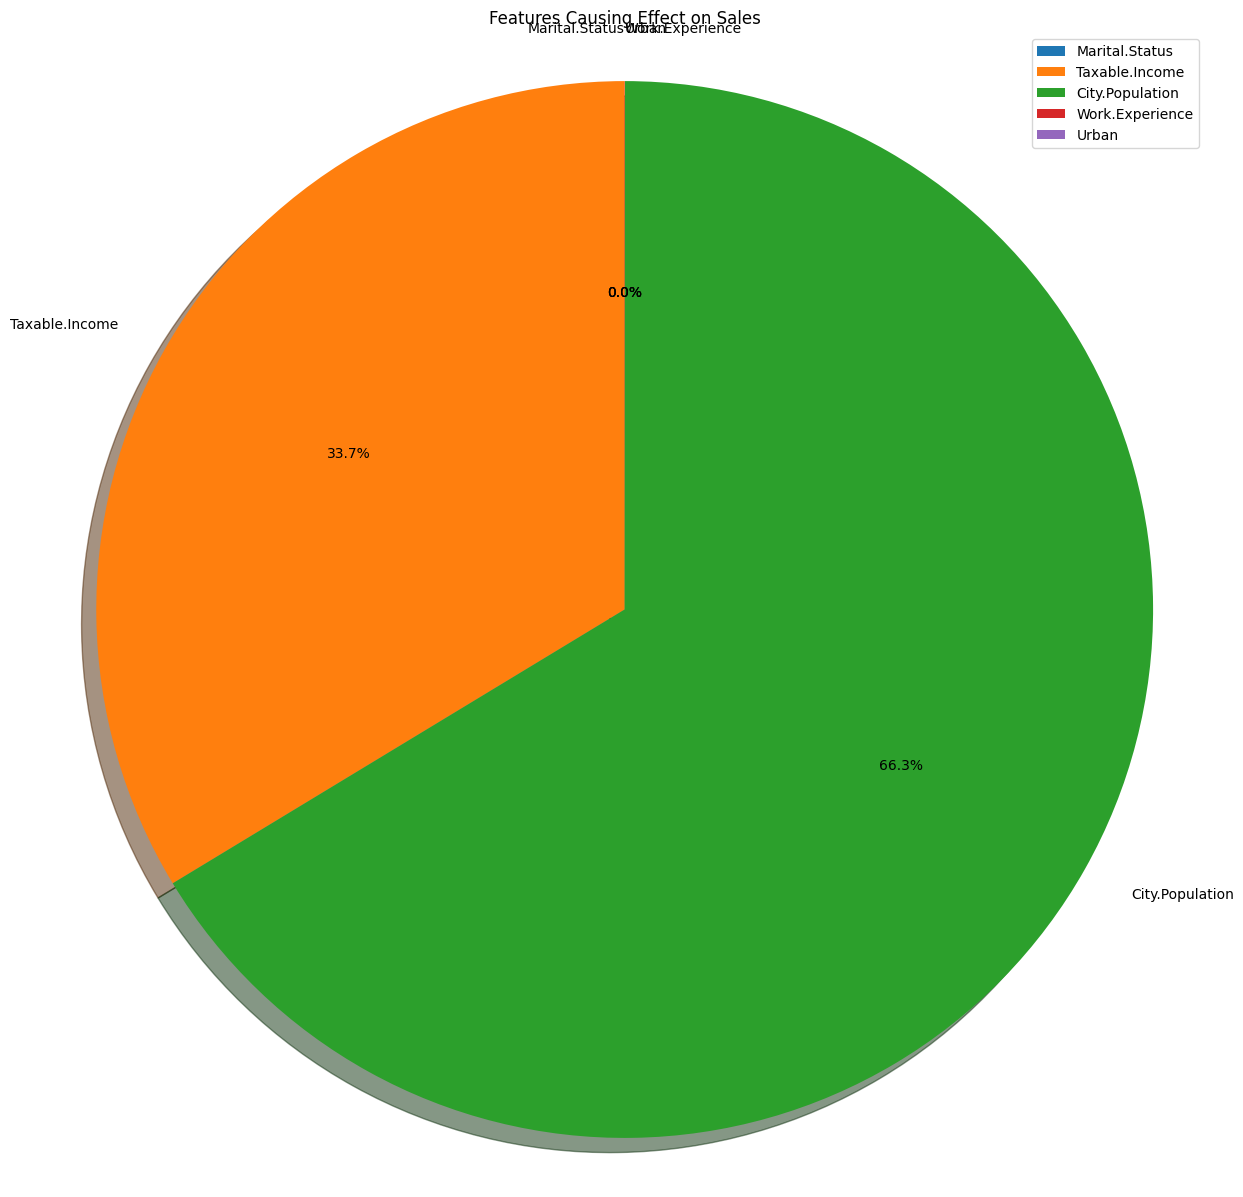

In [26]:
labels = Data.columns[1:]
sizes = Data.mean(axis=0)[1:]
fig1, ax1 = plt.subplots(figsize=(15, 15))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.title('Features Causing Effect on Sales')
plt.legend()
plt.show()

In [28]:
## Adaboost
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [29]:
num_tress = 10
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)

In [30]:
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
model


AdaBoostClassifier(random_state=7)

In [31]:
results = cross_val_score(model, x,y, cv=kfold)
results

array([0.45      , 0.45      , 0.38333333, 0.43333333, 0.48333333,
       0.46666667, 0.61666667, 0.65      , 0.4       , 0.48333333])

In [32]:
print(results.mean())

0.48166666666666674


In [33]:
## stacking ensemble for classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [34]:
kfold = KFold(n_splits=10)

In [35]:
estimators = [ ]

model1 = LogisticRegression(max_iter=500)
estimators.append(('Logistic', model1))

model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))

model3 = SVC()
estimators.append(('svc', model3))

## create ensemble method
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x, y, cv=kfold)

In [36]:
estimators

[('Logistic', LogisticRegression(max_iter=500)),
 ('cart', DecisionTreeClassifier()),
 ('svc', SVC())]

In [37]:
results

array([0.58333333, 0.53333333, 0.61666667, 0.63333333, 0.41666667,
       0.63333333, 0.58333333, 0.48333333, 0.41666667, 0.5       ])

In [38]:
print(results.mean())

0.54
